<a href="https://colab.research.google.com/github/MittalNeha/EIP4/blob/master/Nineth_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


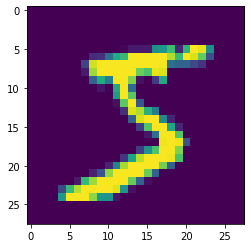

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# from keras.layers import Activation
# model = Sequential()

# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), bias=False)) # 26
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 24
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(32, 3, 3, activation='relu', bias=False)) # 22
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# # model.add(Dropout(0.25))

# model.add(MaxPooling2D(pool_size=(2, 2))) # 11
# model.add(Convolution2D(10, 1, 1, activation='relu', bias=False)) # 11
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 9
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 7
# model.add(BatchNormalization())
# # model.add(Dropout(0.25))
# model.add(Dropout(0.1))

# model.add(Convolution2D(10, 1, activation='relu', bias=False)) #7
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3,3, activation='relu', bias=False)) #5
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3,3, activation='relu', bias=False)) #3
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(10, 3,3, activation='relu', bias=False)) #1
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# # model.add(Convolution2D(10, 7))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [0]:
from keras.layers import Activation
model = Sequential()

# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), bias=False)) # 26
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu', bias=False)) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu', bias=False)) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 7
model.add(BatchNormalization())
# model.add(Dropout(0.25))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu', bias=False)) # 7
model.add(BatchNormalization())
# model.add(Dropout(0.25))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 3

model.add(Convolution2D(10, 1, activation='relu', bias=False)) #3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3,3, activation='relu', bias=False)) #1
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.03 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.03.
60000/60000 [==============================] - 11s 181us/step - loss: 0.1585 - acc: 0.9512 - val_loss: 0.0988 - val_acc: 0.9712
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0227445034.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0680 - acc: 0.9789 - val_loss: 0.0760 - val_acc: 0.9759
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0183150183.
60000/60000 [==============================] - 6s 97us/step - loss: 0.0550 - acc: 0.9831 - val_loss: 0.0357 - val_acc: 0.9884
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0153295861.
60000/60000 [==============================] - 6s 96us/step - loss: 0.0477 - acc: 0.9849 - val_loss: 0.0365 - val_acc: 0.9882
Epoch 5/20


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.01894508793054847, 0.9942]
